# Herkenning van handgeschreven cijfers met Deep Learning 2

## Convolutionele Neurale Netwerken

Stijn Oomes

donderdag 16 september 2021

## Importeer libraries

In [1]:
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns; sns.set()

from tensorflow.keras.utils import to_categorical
from keras import models, layers

from keras.datasets import mnist
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D, AveragePooling2D

## Verover de data

In [2]:
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

In [3]:
train_images.shape

(60000, 28, 28)

In [4]:
train_labels.shape

(60000,)

## Prepareer de images

* normalizeren --> pixel waardes tussen 0.0 en 1.0
* reshapen --> extra dimensie!

In [5]:
train_images.shape

(60000, 28, 28)

In [6]:
train_images_normalized = train_images.astype('float32')/255

In [38]:
train_images_enhanced = train_images_normalized.reshape(60000,28,28,1)

In [39]:
train_images_enhanced.shape

(60000, 28, 28, 1)

Doe hetzelfde met de test images:

In [40]:
test_images_normalized = test_images.astype('float32')/255

In [51]:
test_images_enhanced = test_images.reshape((10000,28,28,1))

In [52]:
test_images_enhanced.shape

(10000, 28, 28, 1)

## Prepareer de labels

**OPDRACHT**: introduceer "one-hot encoding" voor de labels (zowel train set als de test set)

In [53]:
train_labels

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

In [54]:
train_labels_encoded = to_categorical(train_labels)
test_labels_encoded = to_categorical(test_labels)

In [55]:
train_labels_encoded[0:5]

array([[0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.]], dtype=float32)

In [56]:
test_labels_encoded

array([[0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

## Definieeer netwerk / model

**OPDRACHT**: voeg nog 1 convolutie laag en nog 1 volledig verbonden laag toe

In [57]:
cnn = models.Sequential()

cnn.add(Conv2D(filters=32,
                  kernel_size=(3, 3),
                  activation='relu', 
                  input_shape=(28,28,1)))
cnn.add(AveragePooling2D())
cnn.add(Flatten())
cnn.add(Dropout(0.5))
cnn.add(Dense(units=64, activation='relu'))
cnn.add(Dense(units=10, activation = 'softmax'))

In [58]:
cnn.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
average_pooling2d_3 (Average (None, 13, 13, 32)        0         
_________________________________________________________________
flatten_3 (Flatten)          (None, 5408)              0         
_________________________________________________________________
dropout_3 (Dropout)          (None, 5408)              0         
_________________________________________________________________
dense_6 (Dense)              (None, 64)                346176    
_________________________________________________________________
dense_7 (Dense)              (None, 10)                650       
Total params: 347,146
Trainable params: 347,146
Non-trainable params: 0
________________________________________________

In [59]:
cnn.compile(optimizer='adam',
            metrics = ['accuracy'],
            loss = 'categorical_crossentropy')

**OPDRACHT**: meet hoe lang het trainen duurt, niet met %%timeit maar met time.time().


In [67]:
history_cnn = cnn.fit(train_images_enhanced,
        train_labels_encoded,
        epochs = 10, # varieer het aantal epochs
        batch_size = 200,
        validation_data = (test_images_enhanced, test_labels_encoded))

Epoch 1/10
300/300 [==============================] - 10s 32ms/step - loss: 0.0320 - accuracy: 0.9897 - val_loss: 13.4059 - val_accuracy: 0.9813
Epoch 2/10
300/300 [==============================] - 9s 31ms/step - loss: 0.0290 - accuracy: 0.9906 - val_loss: 13.0998 - val_accuracy: 0.9811
Epoch 3/10
300/300 [==============================] - 9s 31ms/step - loss: 0.0273 - accuracy: 0.9909 - val_loss: 14.9334 - val_accuracy: 0.9801
Epoch 4/10
300/300 [==============================] - 9s 31ms/step - loss: 0.0274 - accuracy: 0.9908 - val_loss: 17.2310 - val_accuracy: 0.9765
Epoch 5/10
300/300 [==============================] - 9s 31ms/step - loss: 0.0261 - accuracy: 0.9915 - val_loss: 15.1624 - val_accuracy: 0.9815
Epoch 6/10
300/300 [==============================] - 9s 31ms/step - loss: 0.0237 - accuracy: 0.9919 - val_loss: 14.1533 - val_accuracy: 0.9819
Epoch 7/10
300/300 [==============================] - 9s 31ms/step - loss: 0.0253 - accuracy: 0.9915 - val_loss: 14.1499 - val_accuracy

**OPDRACHT**: meet hoe lang het testen duurt, niet met %%timeit maar met time.time().

In [68]:
loss, acc = cnn.evaluate(test_images_enhanced,
                         test_labels_encoded)

print(acc)

313/313 [==============================] - 1s 2ms/step - loss: 20.5911 - accuracy: 0.9786
0.978600025177002


**OPDRACHT**: voeg labels aan deze grafiek toe

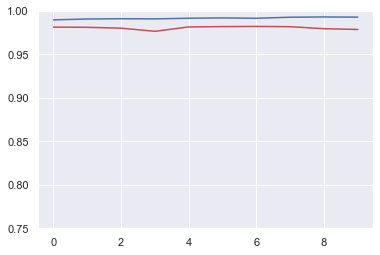

In [69]:
plt.plot(history_cnn.history['accuracy'])
plt.plot(history_cnn.history['val_accuracy'],'r')
plt.ylim(0.75,1.0)
plt.show()

**OPDRACHT**: evalueer je resultaten:

* hoe is de nauwkeurigheid?
* is het netwerk onder- of over-trained?
* laat een paar fouten zien
 * wat kun je zeggen over de aard van de fouten?
* wat is sneller: het trainen of het testen?
* wat kun je nog doen om de nauwkeurigheid te verhogen?

(noteer de veranderingen die je hebt aangebracht en wat daar de resultaten van zijn)

## Evalueer cijferherkenning met kNN, NN, en CNN

**OPDRACHT**: evalueer je resultaten:

vergelijk de resultaten van kNN, NN, en CNN

* wat concludeer je hieruit?
* welke type fouten maken de verschillende classifiers?


